**Step 0 - import NN libraries**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Commonly used modules
import numpy as np
from keras.utils import np_utils
import os
import sys
import math

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Step 1 - Load the data**

In [2]:
# Loading data from keras datasets
data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
print(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

**Step 2 - Data pre-processing & Step 3 - Divide dataset into Train/Test**

In [3]:
# Spliting train and test data from datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

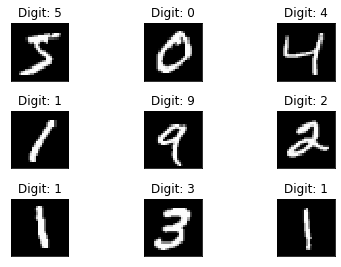

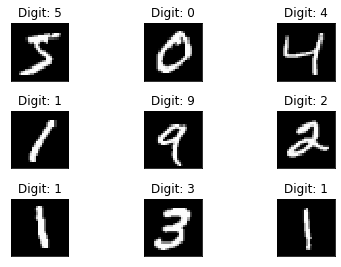

In [4]:
# plotting train data 
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

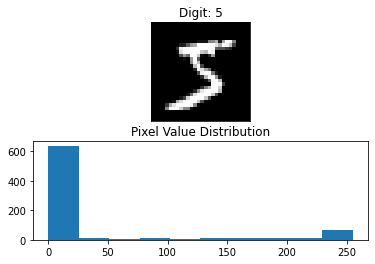

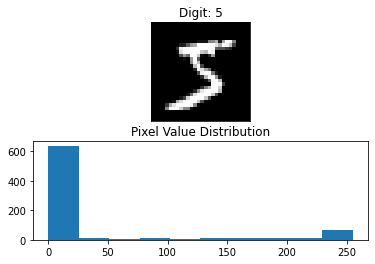

In [5]:
# Visualizing first data
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [6]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data to help with the training
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [7]:
# Checking for unique value
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)

# One hot encoding for categorical target labels 
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
print(Y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
x_train.shape

(60000, 784)

In [14]:
Y_train.shape


(60000, 10)

In [15]:
x_test.shape


(10000, 784)

In [16]:
Y_test.shape

(10000, 10)

**Step 4 - Build a simple dense network, use ExponentialLearningRate()**

In [17]:
# Creating simple dense network
def create_model(): 
    model = Sequential([Flatten(input_shape=(28, 28)),
        Dense(300, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')])
    return model

In [18]:
# Defining function for plotting learning rate

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [19]:
# Defining function for plotting graph based on metric

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [20]:
# Defining function for learning rate vs loss

def plot_metric2(history, metric):
    train_metrics = history.history[metric]
    learning_rate = history.history['lr']
    val_metrics = history.history['val_'+metric]
    #epochs = range(1, len(train_metrics) + 1)
    plt.plot(learning_rate, train_metrics)
    plt.plot(learning_rate, val_metrics)
    plt.title('Training and validation learning rate vs loss '+ metric)
    plt.xlabel("Learning_rate")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [23]:
# Creating first simple dense model with sgd

model = create_model()
model.compile(optimizer='sgd', # Learning rate defaults to 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Training model

initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)
# Fit the model to the training data
history_exp_decay = model.fit(
    x_train, 
    Y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)],
)

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
750/750 [==============================] - 4s 5ms/step - loss: 31062202368.0000 - accuracy: 0.1138 - val_loss: 2.4252 - val_accuracy: 0.1060
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.009048374180359595.
750/750 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.4251 - val_accuracy: 0.1060
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.008187307530779819.
750/750 [==============================] - 3s 4ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.4252 - val_accuracy: 0.1060
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.007408182206817179.
750/750 [==============================] - 3s 4ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.4252 - val_accuracy: 0.1060
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.006703200460356393.
750/750

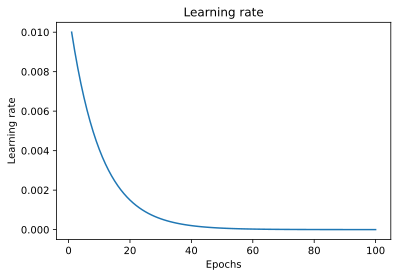

In [25]:
plot_lr(history_exp_decay)

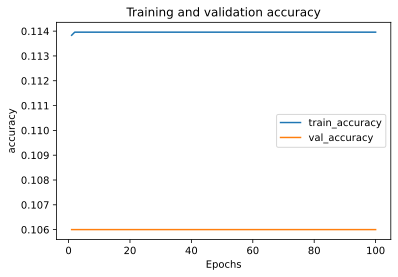

In [26]:
plot_metric(history_exp_decay, 'accuracy')

Step 5 - Use sigmoid, relu, and softmax as activation functions

In [27]:
# Defining function for creating model with sigmoid, relu and softmax as activation functions

def create_model2(): 
    model = Sequential([Flatten(input_shape=(28, 28)),
        Dense(300, activation='sigmoid'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')])
    return model

In [28]:
# Creating model with sigmoid, relu and softmax

model2 = create_model2()
model2.compile(optimizer='sgd', # Learning rate defaults to 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Training model

initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)
# Fit the model to the training data
history_exp_decay2 = model2.fit(
    x_train, 
    Y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)],
)

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
750/750 [==============================] - 4s 5ms/step - loss: 0.6989 - accuracy: 0.8168 - val_loss: 0.3497 - val_accuracy: 0.9053
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.009048374180359595.
750/750 [==============================] - 3s 4ms/step - loss: 0.3266 - accuracy: 0.9071 - val_loss: 0.2777 - val_accuracy: 0.9221
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.008187307530779819.
750/750 [==============================] - 3s 5ms/step - loss: 0.2653 - accuracy: 0.9226 - val_loss: 0.2442 - val_accuracy: 0.9316
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.007408182206817179.
750/750 [==============================] - 3s 4ms/step - loss: 0.2317 - accuracy: 0.9340 - val_loss: 0.2237 - val_accuracy: 0.9355
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.006703200460356393.
750/750 [========

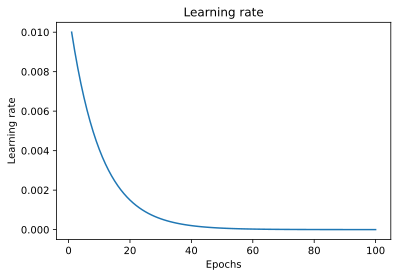

In [30]:
plot_lr(history_exp_decay2)

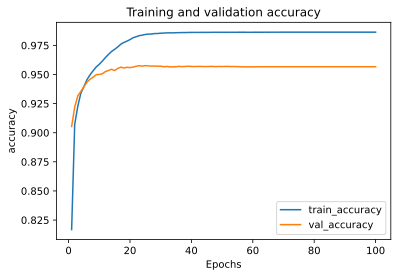

In [31]:
plot_metric(history_exp_decay2, 'accuracy')

Step 6 - Plot loss as a function of learning rate

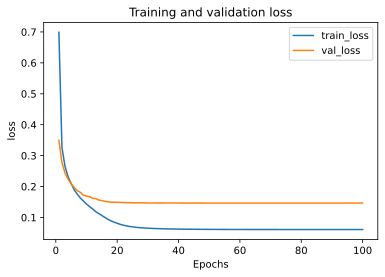

In [32]:
plot_metric(history_exp_decay2, 'loss')

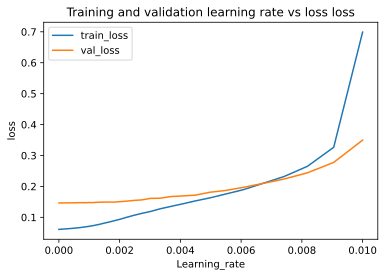

In [33]:
plot_metric2(history_exp_decay2, 'loss')

Step 7 - What is the value of lr when loss shoots up? Report answer.

Loss shoots up when learning rate is **0.009** for training and validation.

Step 8 - compile losses, use various optimizers. Check the documentation on losses to learn more.

In [34]:
model_adam = create_model2()
model_adam.compile(optimizer='adam', # Learning rate defaults to 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model_adam.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
initial_learning_rate = 0.005
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)
# Fit the model to the training data
history_exp_decay_adam = model_adam.fit(
    x_train, 
    Y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)],
)

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
750/750 [==============================] - 4s 5ms/step - loss: 0.6555 - accuracy: 0.7867 - val_loss: 0.5279 - val_accuracy: 0.8213
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0045241870901797975.
750/750 [==============================] - 4s 5ms/step - loss: 0.5105 - accuracy: 0.8325 - val_loss: 0.4655 - val_accuracy: 0.8530
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0040936537653899095.
750/750 [==============================] - 4s 5ms/step - loss: 0.4623 - accuracy: 0.8519 - val_loss: 0.4333 - val_accuracy: 0.8597
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0037040911034085895.
750/750 [==============================] - 4s 5ms/step - loss: 0.3901 - accuracy: 0.8755 - val_loss: 0.3657 - val_accuracy: 0.8846
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.0033516002301781965.
750/750 [===

Step 9 - Use earlystoppping() when the desired metric has stopped improving

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False)

model3 = create_model2()
model3.compile(optimizer='sgd', # Learning rate defaults to 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy'])
history = model3.fit(x_train, 
    Y_train, 
    epochs=800, 
    validation_split=0.2,
    batch_size=64, callbacks=[callback])
len(history.history['loss']) 


Epoch 1/800
750/750 [==============================] - 4s 5ms/step - loss: 0.6950 - accuracy: 0.8117 - val_loss: 0.3597 - val_accuracy: 0.9006
Epoch 2/800
750/750 [==============================] - 3s 4ms/step - loss: 0.3350 - accuracy: 0.9046 - val_loss: 0.2913 - val_accuracy: 0.9188
Epoch 3/800
750/750 [==============================] - 3s 4ms/step - loss: 0.2735 - accuracy: 0.9213 - val_loss: 0.2553 - val_accuracy: 0.9262
Epoch 4/800
750/750 [==============================] - 3s 5ms/step - loss: 0.2424 - accuracy: 0.9298 - val_loss: 0.2371 - val_accuracy: 0.9296
Epoch 5/800
750/750 [==============================] - 3s 4ms/step - loss: 0.2213 - accuracy: 0.9358 - val_loss: 0.2138 - val_accuracy: 0.9381
Epoch 6/800
750/750 [==============================] - 3s 5ms/step - loss: 0.2039 - accuracy: 0.9408 - val_loss: 0.2050 - val_accuracy: 0.9398
Epoch 7/800
750/750 [==============================] - 3s 4ms/step - loss: 0.1910 - accuracy: 0.9435 - val_loss: 0.1937 - val_accuracy: 0.9428

32

**Early stopping function stopped at 32 Epoch**

Step 10 - create checkpoint

In [37]:
from keras.callbacks import ModelCheckpoint

model4 = create_model2()
model4.compile(optimizer='sgd', # Learning rate defaults to 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy'])

filepath="./checkpoint/weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history2 = model4.fit(x_train, 
    Y_train, 
    epochs=150, 
    validation_split=0.2,
    batch_size=64, callbacks=[callbacks_list])

Epoch 1/150
750/750 [==============================] - 4s 5ms/step - loss: 0.6855 - accuracy: 0.8161 - val_loss: 0.3638 - val_accuracy: 0.9013

Epoch 00001: accuracy improved from -inf to 0.81606, saving model to ./checkpoint/weights-improvement-01-0.82.hdf5
Epoch 2/150
750/750 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.9058 - val_loss: 0.2840 - val_accuracy: 0.9192

Epoch 00002: accuracy improved from 0.81606 to 0.90579, saving model to ./checkpoint/weights-improvement-02-0.91.hdf5
Epoch 3/150
750/750 [==============================] - 3s 4ms/step - loss: 0.2733 - accuracy: 0.9218 - val_loss: 0.2502 - val_accuracy: 0.9278

Epoch 00003: accuracy improved from 0.90579 to 0.92177, saving model to ./checkpoint/weights-improvement-03-0.92.hdf5
Epoch 4/150
750/750 [==============================] - 3s 5ms/step - loss: 0.2425 - accuracy: 0.9305 - val_loss: 0.2235 - val_accuracy: 0.9367

Epoch 00004: accuracy improved from 0.92177 to 0.93046, saving model to .

Step 11 - report accuracy

In [38]:
# Score for default simple dense model
scores = model.evaluate(x_test, Y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 2.3402 - accuracy: 0.1135
Accuracy:  11.349999904632568


In [39]:
# Score for model with adam optimizer

scores = model_adam.evaluate(x_test, Y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1496 - accuracy: 0.9541
Accuracy:  95.41000127792358


In [40]:
# Score for model with 100 epoch and 0.01 learning rate

scores = model2.evaluate(x_test, Y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1423 - accuracy: 0.9574
Accuracy:  95.74000239372253


In [41]:
# Score for model with early stopper function

scores = model3.evaluate(x_test, Y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9608
Accuracy:  96.07999920845032


In [42]:
# Score for model with checkpoint function

scores = model4.evaluate(x_test, Y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1058 - accuracy: 0.9688
Accuracy:  96.88000082969666
